# Assignment 3

## Visualization Technique (25%)

### A narrative description of each visualization type in your dashboard 

- **Histogram:** This histogram displays the distribution of a single numeric variable by grouping values into bins. It helps visualize the shape, spread, and central tendency of a dataset. In this dashboard, it is used to show how variables like GDP or life expectancy vary across countries within a specific year.

- **Box Plot:** This box plot is used to depict the distribution of a variable across different groups, highlighting the median, quartiles, and outliers. It’s ideal for comparing grouped statistics such as fertility or population between continents or regions.

- **Scatter Plot:** This plot shows relationships between two continuous variables. With size and color encodings, it reveals multidimensional patterns. For example, it can demonstrate how GDP correlates with life expectancy, with population shown as marker size.

- **Correlation Heatmap:** This heatmap shows the correlation between numeric variables (e.g., GDP, population, life expectancy) in the selected year. It complements the interactive graphs by revealing underlying data relationships.

- **Line Plot:**  This line plot shows how a variable changes over time across a selected year range. It helps highlight long-term trends but was replaced in the refined version by the heatmap to avoid blending data across years and focus on clear relationships at a single point in time.


### A discussion of how these visualizations complement each other and when each should be used, Dashboard-specific considerations like interactivity options 

These visualizations serve different but complementary roles:
- Histograms and box plots summarize distributions.
- Scatter plots show relationships and group differences.
- Correlation heatmap gives context and structure across variables.
- First three plots are interactive; the fourth heatmap is static.



## Visualization Library (25%)

### The dashboard framework and libraries you're using, and why they're suitable for this visualization. For instance, who created it? Is it open source? How do you install it? It is important to clarify that you should not use Altair or Matplotlib for this assignment.

- **ipywidgets**: Adds sliders and dropdowns for interactivity in Jupyter.
- **IPython**: Display graphs and clear display.
- **matplotlib / seaborn**: For plotting charts.
- **pandas/numpy**: Data wrangling.
- **plotly.express**: Used for loading the Gapminder dataset conveniently, even though it's not used for visualization here. For some reasons, 'gapminder' cannot be loaded using 'sns.load_dataset' function.

These are open source, widely supported in Jupyter, and ideal for building quick dashboards without external servers.

### A discussion of the general approach and limitations of this framework. For instance, is it declarative or procedural? Does it integrate with Jupyter? Why did you decide to use this framework (especially if there are other options)? 

This dashboard is built using a procedural programming approach with matplotlib, seaborn, and ipywidgets. Each plot is generated using function calls (sns.histplot, sns.boxplot, etc.), and the dashboard interactivity is handled using the @interact decorator from ipywidgets. This approach gives you full control over the flow of logic, plot customization, and layout.

This framework integrates directly with Jupyter Notebooks, making it well-suited for educational use, exploratory data analysis, and prototyping. Because both matplotlib and ipywidgets are native to the Jupyter environment, there is no need for additional servers or deployment frameworks like Panel or Streamlit. All interactions remain within the notebook interface, allowing for a smooth user experience during development and presentation.

I chose this framework because:
- It aligns with the tools and concepts introduced in class
- It keeps the learning curve manageable while still enabling meaningful interactivity
- It avoids heavier frameworks that require app deployment
- It is sufficient for visual storytelling using Gapminder data, especially for histograms, scatter plots, box plots, and heatmaps

Limitations include:
- Layout is manually managed using plt.subplots, and lacks grid flexibility
- Unlike declarative frameworks (e.g., Altair or Plotly), interactions are harder to scale or abstract
- Outputs cannot be easily exported or deployed as standalone apps without tools like Voilà

Nonetheless, this setup achieves the goal of combining multiple interactive plots in one screen and is ideal for notebook-based presentations.

## Demonstration (60%)

### The dataset you picked and the instructions for cleaning the dataset. You should pick a suitable dataset to demonstrate multiple visualization types and interactive features working together. 

The dataset comes from **Bokeh’s Gapminder sample data**, representing global development indicators across countries and years.

It includes variables such as:
- Life Expectancy
- Fertility Rate
- GDP per capita
- Population
- Child Mortality

We renamed columns for clarity and selected numeric and categorical features using pandas. The dashboard uses widgets for year, metric selection, grouping, and point size control.


In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from ipywidgets import interact, IntSlider, Dropdown, IntRangeSlider
from IPython.display import display, clear_output, Image
import plotly.express as px

# Load and clean Gapminder dataset from Plotly
df = px.data.gapminder()

df.to_csv("gapminder_data.csv", index=False)

df = df.rename(columns={
    'country': 'Country',
    'continent': 'Region',
    'year': 'Year',
    'lifeExp': 'Life Expectancy',
    'gdpPercap': 'GDP',
    'pop': 'Population'
})

numeric_cols = list(df.select_dtypes(include=[np.number]).columns)
categorical_cols = list(df.select_dtypes(exclude=[np.number]).columns)

In [2]:
numeric_cols
categorical_cols

['Country', 'Region', 'iso_alpha']

In [3]:
df.head(10)

,Country,Region,Year,Life Expectancy,Population,GDP,iso_alpha,iso_num
0,Afghanistan,Asia,1952,28.801,8425333,779.445314,AFG,4
1,Afghanistan,Asia,1957,30.332,9240934,820.853030,AFG,4
2,Afghanistan,Asia,1962,31.997,10267083,853.100710,AFG,4
3,Afghanistan,Asia,1967,34.020,11537966,836.197138,AFG,4
4,Afghanistan,Asia,1972,36.088,13079460,739.981106,AFG,4
5,Afghanistan,Asia,1977,38.438,14880372,786.113360,AFG,4
6,Afghanistan,Asia,1982,39.854,12881816,978.011439,AFG,4
7,Afghanistan,Asia,1987,40.822,13867957,852.395945,AFG,4
8,Afghanistan,Asia,1992,41.674,16317921,649.341395,AFG,4
9,Afghanistan,Asia,1997,41.763,22227415,635.341351,AFG,4


### The quality of your demonstration. First, demonstrate building basic dashboard components, then show how to implement interactivity and advanced features. This is the "meat" of the assignment. For reference, you should have at least 4 graph types in your dashboard that work together to tell a cohesive story.

### Dashboard expected: Multiple visualizations are visible on a single screen with interactive features that affect multiple visualizations simultaneously.

Below are two versions I created, both designed to accomplish the same goals: generating four types of visualizations, incorporating widgets, enabling interactivity, and organizing the overall layout.

The first version reflects my refined and optimized approach, while the second version is a direct adaptation of the class notes with some edits. 

The key difference is that I chose a correlation heatmap (SPLOM) instead of a line plot, as I believe it offers a more effective way to quickly grasp the relationships among multiple variables at a glance.

Also, the second version included a range slider (IntRangeSlider) to select a range of years and used a line plot to display trends over time. While functional, I found it less intuitive for this dataset. The refined version was to use a single-year slider (IntSlider) instead of a year range. In my view, focusing on one year at a time avoids mixing data across time periods, which can introduce noise or misleading patterns.

### Refined Version:
##### The dashboard updates four plots simultaneously:

- Histogram (top-left): Distribution of the selected variable in the chosen year.
- Box Plot (top-right): Spread and comparison of the variable across regions.
- Scatter Plot (bottom-left): Life Expectancy vs. selected variable, with population as size and region as color.
- Correlation Heatmap (bottom-right): Static view of how GDP, life expectancy, and population correlate with each other for that year.

In [4]:
# Widget controls
year_slider = IntSlider(value=2007, min=df['Year'].min(), max=df['Year'].max(), step=5, description='Year:')
xvar_dropdown = Dropdown(options=['GDP', 'Life Expectancy', 'Population'], value='GDP', description='X Variable:')
yvar_dropdown = Dropdown(options=['GDP', 'Life Expectancy', 'Population'], value='Life Expectancy', description='Y Variable:')

@interact(year=year_slider, xvar=xvar_dropdown, yvar=yvar_dropdown)
def dashboard(year, xvar, yvar):
    data_year = df[df['Year'] == year]
    data_corr = data_year[['GDP', 'Life Expectancy', 'Population']].corr()

    fig, axs = plt.subplots(2, 2, figsize=(18, 10))

    # Histogram
    sns.histplot(data=data_year, x=xvar, kde=True, ax=axs[0, 0])
    axs[0, 0].set_title(f'Histogram of {xvar} ({year})')

    # Box Plot
    sns.boxplot(data=data_year, x='Region', y=xvar, ax=axs[0, 1])
    axs[0, 1].set_title(f'{xvar} by Region ({year})')
    axs[0, 1].tick_params(axis='x', rotation=45)

    # Scatter Plot
    sns.scatterplot(data=data_year, x=xvar, y=yvar, size='Population', hue='Region', ax=axs[1, 0], legend=False)
    axs[1, 0].set_title(f'{yvar} vs {xvar} ({year})')

    # Correlation Heatmap (non-interactive)
    sns.heatmap(data_corr, annot=True, cmap='coolwarm', ax=axs[1, 1])
    axs[1, 1].set_title(f'Correlation Heatmap ({year})')

    plt.tight_layout()
    plt.show()

interactive(children=(IntSlider(value=2007, description='Year:', max=2007, min=1952, step=5), Dropdown(descrip…

This setup:

- Keeps all plots on one screen for comparison

- Avoids the noise of multi-year aggregations

- Emphasizes clarity and precision by focusing on a single snapshot in time

### iPywidgets Version:

##### Part 1: Building Our Visualization Functions

Let's test our histogram function:


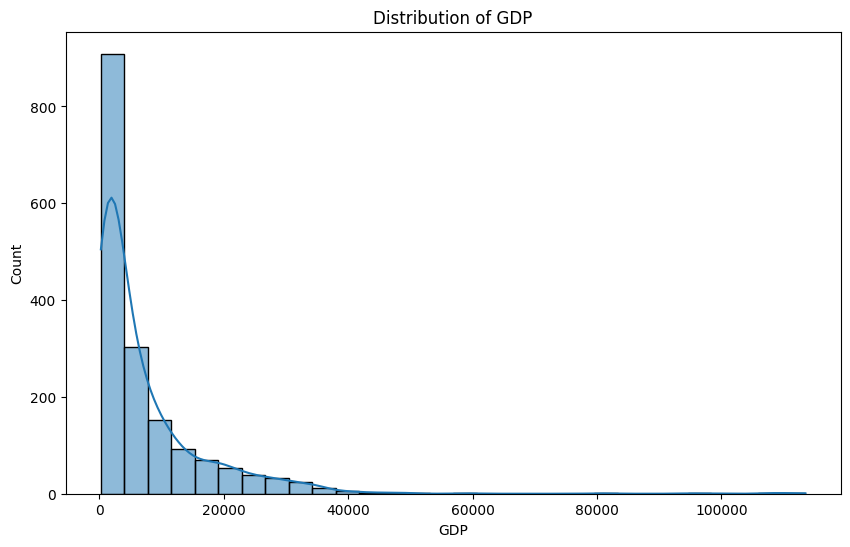


Testing scatter plot with color grouping:


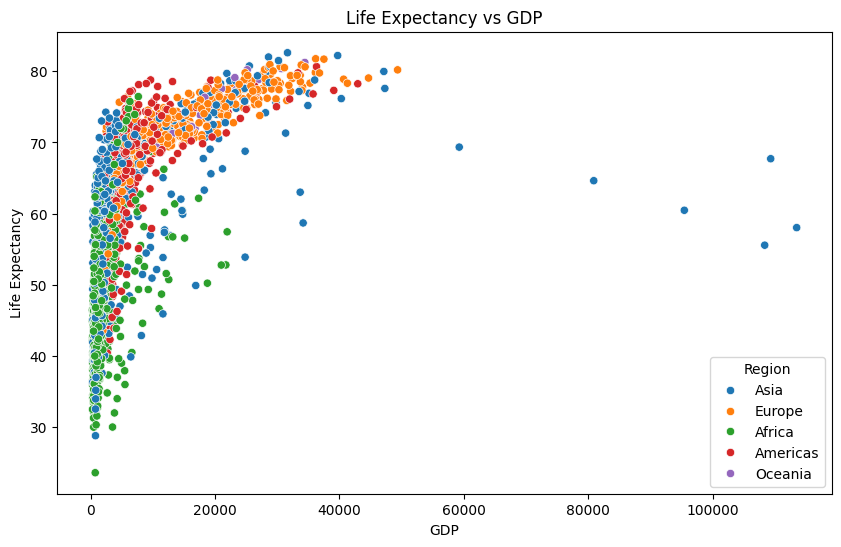


Testing box plot:


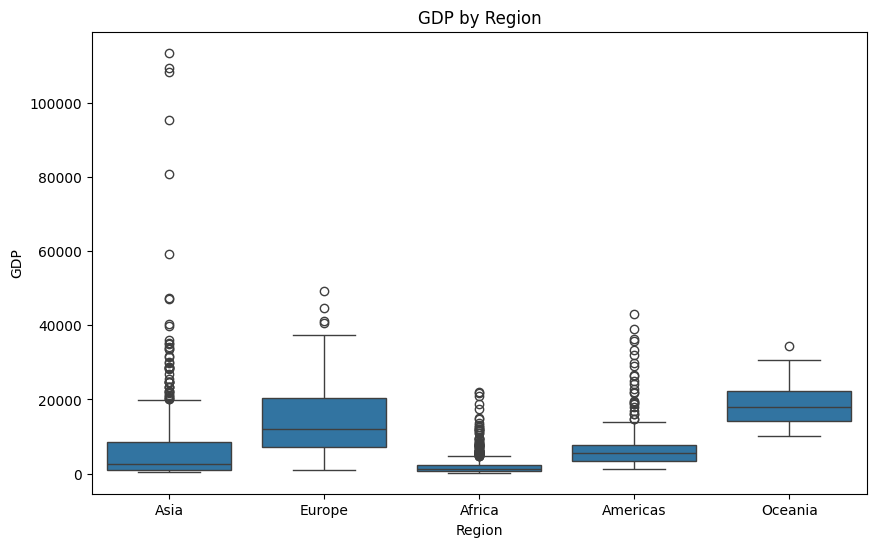


Testing line plot:


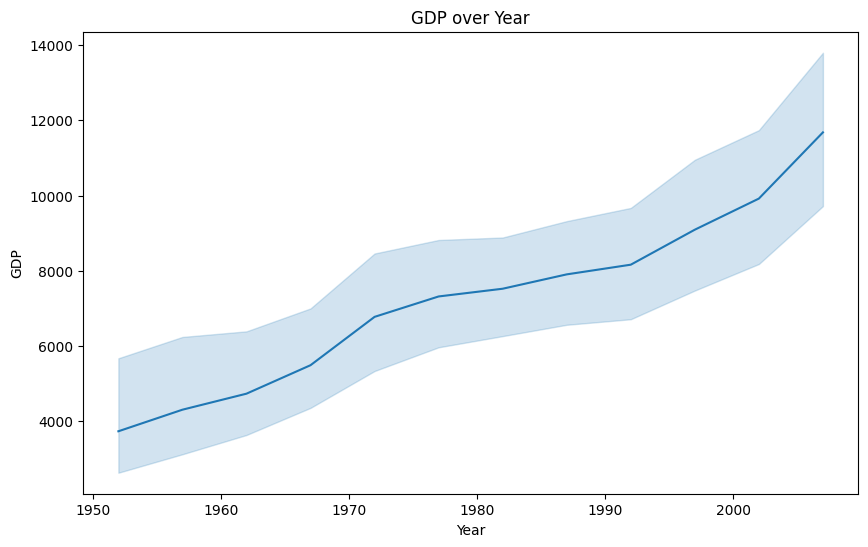

In [5]:
def create_histogram(data, column, bins=30, kde=True, title=None):
 """
 Creates a histogram with optional KDE plot.
 Parameters:
 -----------
 data : pandas DataFrame
 The input dataset
 column : str
 Column name to plot
 bins : int
 Number of bins for histogram
 kde : bool
 Whether to include KDE plot
 title : str
 Plot title (optional)
 """
 plt.figure(figsize=(10, 6))
 sns.histplot(data=data, x=column, kde=kde, bins=bins)
 plt.title(title or f'Distribution of {column}')
 plt.xlabel(column)
 plt.ylabel('Count')
print("Let's test our histogram function:")
create_histogram(df, 'GDP')
plt.show() 

def create_scatter(data, x_col, y_col, hue_col=None, title=None):
 """
 Creates a scatter plot with optional color grouping.
 Parameters:
 -----------
 data : pandas DataFrame
 The input dataset
 x_col : str
 Column name for x-axis
 y_col : str
 Column name for y-axis
 hue_col : str
 Column name for color grouping (optional)
 title : str
 Plot title (optional)
 """
 plt.figure(figsize=(10, 6))
 sns.scatterplot(data=data, x=x_col, y=y_col, hue=hue_col)
 plt.title(title or f'{y_col} vs {x_col}')
print("\nTesting scatter plot with color grouping:")
create_scatter(df, 'GDP', 'Life Expectancy', 'Region')
plt.show()

def create_boxplot(data, x_col, y_col, title=None):
 """
 Creates a box plot for comparing distributions.
 Parameters:
 -----------
 data : pandas DataFrame
 The input dataset
 x_col : str
 Column name for grouping
 y_col : str
 Column name for values
 title : str
 Plot title (optional)
 """
 plt.figure(figsize=(10, 6))
 sns.boxplot(data=data, x=x_col, y=y_col)
 plt.title(title or f'{y_col} by {x_col}')
print("\nTesting box plot:")
create_boxplot(df, 'Region', 'GDP')
plt.show() 

def create_lineplot(data, x_col, y_col, title=None):
 """
 Creates a line plot with confidence interval.
 Parameters:
 -----------
 data : pandas DataFrame
 The input dataset
 x_col : str
 Column name for x-axis
 y_col : str
 Column name for y-axis
 title : str
 Plot title (optional)
 """
 plt.figure(figsize=(10, 6))
 sns.lineplot(data=data, x=x_col, y=y_col)
 plt.title(title or f'{y_col} over {x_col}')
print("\nTesting line plot:")
create_lineplot(df, 'Year', 'GDP')
plt.show()


##### Part 2: Creating a Dashboard


Testing our dashboard:


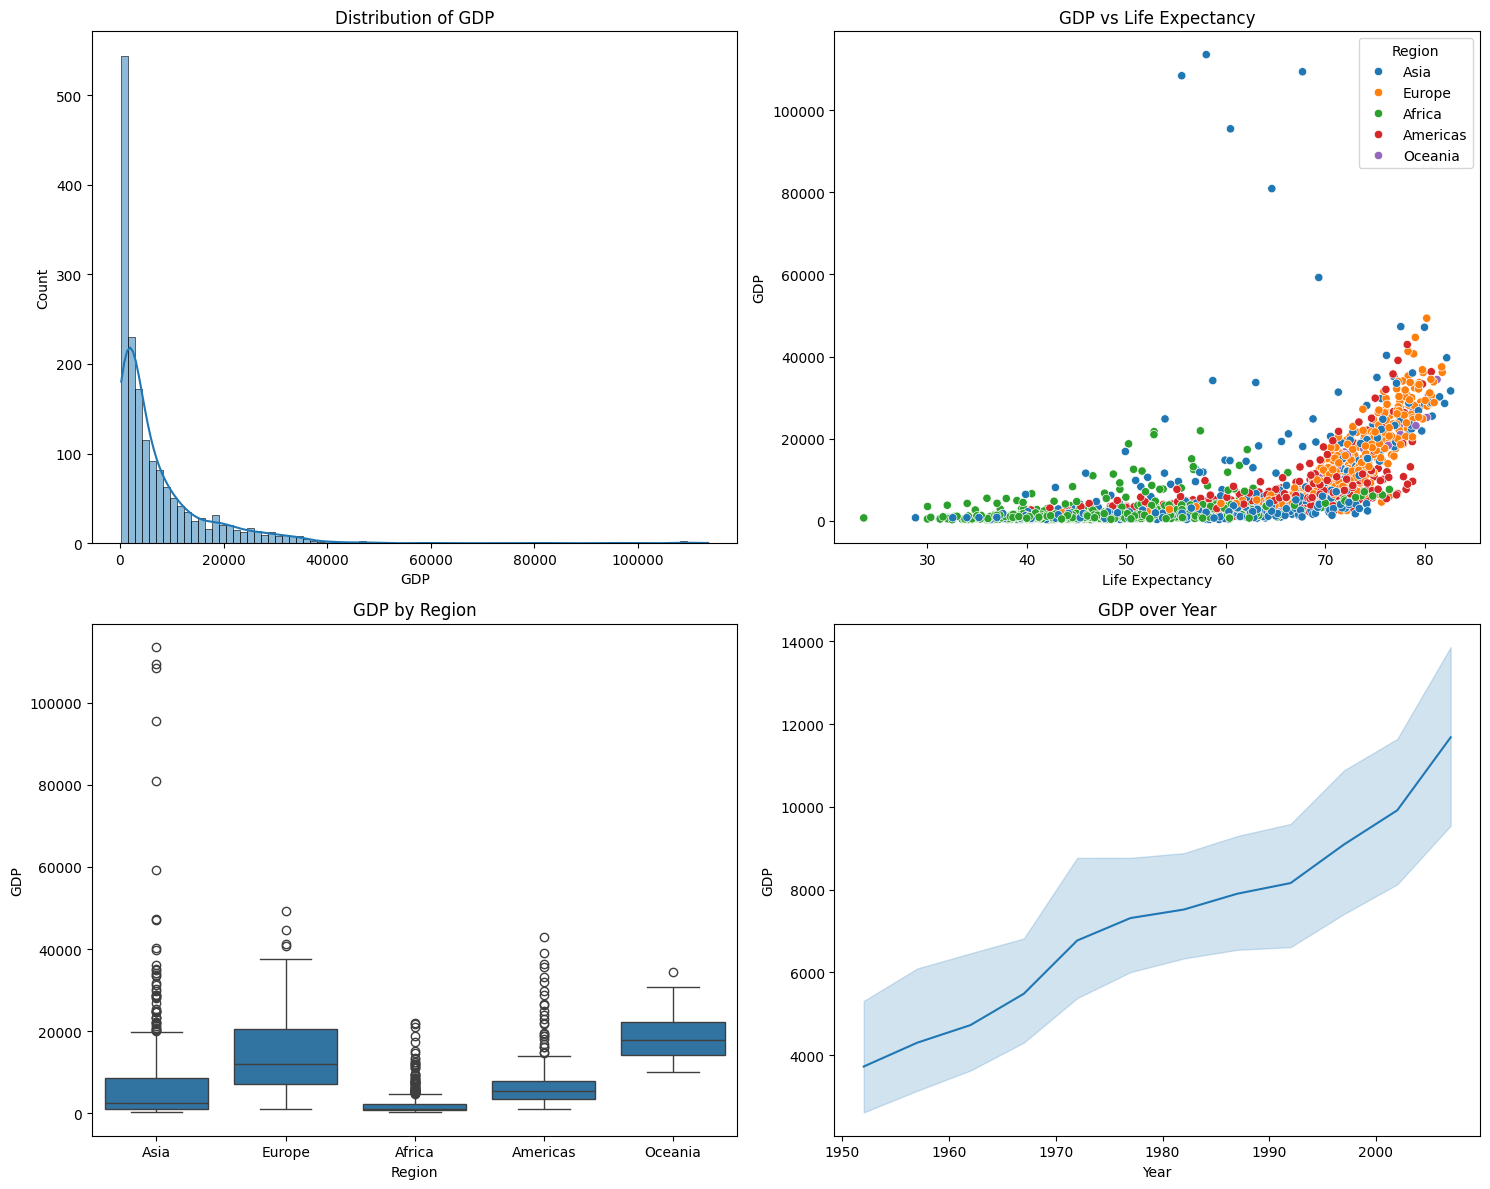

In [6]:
def create_dashboard(data, hist_col='GDP', scatter_x='Life Expectancy', scatter_y='GDP',
 box_x='Region', box_y='GDP', line_x='Year', line_y='GDP'):
 """
 Creates a dashboard combining all our plot types.
 Parameters:
 -----------
 data : pandas DataFrame
 The input dataset
 hist_col : str
 Column for histogram
 scatter_x, scatter_y : str
 Columns for scatter plot
 box_x, box_y : str
 Columns for box plot
 line_x, line_y : str
 Columns for line plot
 """
 fig = plt.figure(figsize=(15, 12))
 gs = fig.add_gridspec(2, 2)
 # Histogram
 ax1 = fig.add_subplot(gs[0, 0])
 sns.histplot(data=data, x=hist_col, kde=True, ax=ax1)
 ax1.set_title(f'Distribution of {hist_col}')
 # Scatter plot
 ax2 = fig.add_subplot(gs[0, 1])
 sns.scatterplot(data=data, x=scatter_x, y=scatter_y, hue='Region', ax=ax2)
 ax2.set_title(f'{scatter_y} vs {scatter_x}')
 # Box plot
 ax3 = fig.add_subplot(gs[1, 0])
 sns.boxplot(data=data, x=box_x, y=box_y, ax=ax3)
 ax3.set_title(f'{box_y} by {box_x}')
 # Line plot
 ax4 = fig.add_subplot(gs[1, 1])
 sns.lineplot(data=data, x=line_x, y=line_y, ax=ax4)
 ax4.set_title(f'{line_y} over {line_x}')
 plt.tight_layout()
 return fig
print("\nTesting our dashboard:")
create_dashboard(df)
plt.show()


##### Part 3: Adding Interactivity

In [7]:
def create_interactive_dashboard():
    """Creates an interactive dashboard with widgets for controlling the display."""
    # First, let's explore widget creation and understand the syntax
    # Get numeric and categorical columns for our dropdown options
    numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
    categorical_cols = df.select_dtypes(include=[object]).columns.tolist()
    # Create a dropdown widget
    # - options: list of possible choices
    # - value: default/initial selection
    # - description: label shown next to widget
    # - style: dictionary of CSS-like styling options
    scatter_x = Dropdown(
        options=numeric_cols,
        value='Life Expectancy',
        description='X Variable:',
        style={'description_width': 'initial'}
    )
    scatter_y = Dropdown(
        options=numeric_cols,
        value='GDP',
        description='Y Variable:',
        style={'description_width': 'initial'}
    )
    # Create a range slider for year selection
    # IntRangeSlider provides two handles for selecting a range
    year_range = IntRangeSlider(
        value=[1952,2007], # Default range
        min=1952, # Minimum value
        max=2007, # Maximum value
        step=1, # Step size
        description='Years:', # Widget label
        continuous_update=False, # Only update when user releases slider
        style={'description_width': 'initial'}
    )
    # The update function that will be called whenever a widget value changes
    # This function must accept parameters matching the widget names we'll use with @interact

    def update(scatter_x_col, scatter_y_col, year_range):
        """
        Update function for our interactive dashboard.
        Parameters match the widget names we use with @interact below.
        Each parameter will receive the current value of its corresponding widget:
        - hist_col: string from hist_dropdown
        - scatter_x_col: string from scatter_x dropdown
        - scatter_y_col: string from scatter_y dropdown
        - year_range: tuple of (min, max) from year_range slider
        """
        # Filter data by year range
        # year_range is a tuple of (min, max) from the IntRangeSlider
        filtered_df = df[
        (df['Year'] >= year_range[0]) &
        (df['Year'] <= year_range[1])
        ]
        # Clear previous output to avoid memory issues
        clear_output(wait=True)

        # Create and display the dashboard with current widget values
        fig = create_dashboard(
            filtered_df,
            scatter_x=scatter_x_col, # Current scatter x-axis selection
            scatter_y=scatter_y_col # Current scatter y-axis selection
        )
        plt.show()

    # Connect widgets to the update function using interact
    # Method 1: Pass widget instances directly
    # - Each parameter name must match the function parameter names
    # - The widget instances we created above are passed as values
    interact(
        update, # Function to call when widgets change
        scatter_x_col=scatter_x, # Maps scatter_x_col parameter to scatter_x widget
        scatter_y_col=scatter_y, # Maps scatter_y_col parameter to scatter_y widget
        year_range=year_range # Maps year_range parameter to year_range widget
     )

# Create and display our interactive dashboard
create_interactive_dashboard()



interactive(children=(Dropdown(description='X Variable:', index=1, options=('Year', 'Life Expectancy', 'Popula…